In [1]:
import pickle
import os
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from ecgdetectors import Detectors
from scipy import signal
from scipy.stats import skew,kurtosis,iqr

In [2]:
filelists = ['../../affect-recognition/data/8d/'+a for a in os.listdir('../../affect-recognition/data/8d/') if a[-1] not in ['s','f']]

In [3]:
filelists[0]

'../../affect-recognition/data/8d/S11.pkl'

In [9]:
from sklearn.preprocessing import RobustScaler
from scipy.stats import mode
activity_dict = {0:'No Label',
                1:'Sitting',
                2:'Stairs',
                3:'Soccer',
                4:'Cycling',
                5:'Driving',
                6:'Lunch',
                7:'Walking',
                8:'Working'}
X_acc = []
X_ppg = []
X_qual = []
X_respiration = []
y_rr = []
y_inspiration = []
y_expiration = []
y_respiration = []
y_activity = []
y_label = []
groups = []
for i in range(len(filelists)):
    data = pickle.load(open(filelists[i],'rb'))
#     print(data['acc_window'].loc[0].shape)
    data['shape'] = data['acc_window'].apply(lambda a:a.shape[0])
    data = data[data['shape']==256]
    data['acc_window'] = data['acc_window'].apply(lambda a:a[:,1:])
    data['data'] = data['data'].apply(lambda a:a.values[:,1:])
#     data['shape'] = data['acc_window'].apply(lambda a:a.shape)
    data['shape'] = data['data'].apply(lambda a:a.shape[0])
    data = data[data['shape']==512]
#     print(data.shape)
    data['shape'] = data['respiration'].apply(lambda a:a.shape[0])
#     print(data['shape'].unique())
    data['activity'] = data['activity'].apply(lambda a:mode(list(a))[0][0])
#     data['activity_label'] = data['activity'].apply(lambda a:activity_dict[a])
    acc_windows = np.array(list(data['acc_window']))
    ppg_windows = np.array(list(data['data']))
    respiration_windows = np.array(list(data['respiration']))
    ppg_data = ppg_windows[:,:,:1].reshape(-1,512)
    ppg_qual_data = ppg_windows[:,:,1:]
    ecg_rr = np.array(list(data['ecg_rr'])).reshape(-1,1)
    inspiration = np.array(list(data['inspiration_duration'])).reshape(-1,1)
    expiration = np.array(list(data['expiration_duration'])).reshape(-1,1)
    respiration = np.array(list(data['respiration_duration'])).reshape(-1,1)
    X_ppg.append(ppg_data)
    X_acc.append(acc_windows)
    X_qual.append(ppg_qual_data)
    X_respiration.append(respiration_windows)
    y_rr.append(ecg_rr)
    y_activity.append(np.array(list(data['activity'])).reshape(-1,1))
    y_label.append(np.array(list(data['hr'])).reshape(-1,1))
    y_inspiration.append(inspiration)
    y_expiration.append(expiration)
    y_respiration.append(respiration)
    groups += [i]*ecg_rr.shape[0]
    print(acc_windows.shape,ppg_data.shape,ppg_qual_data.shape,ecg_rr.shape,len(groups),respiration_windows.shape)

(4519, 256, 3) (4519, 512) (4519, 512, 4) (4519, 1) 4519 (4519, 5590, 1)
(4570, 256, 3) (4570, 512) (4570, 512, 4) (4570, 1) 9089 (4570, 5590, 1)
(3965, 256, 3) (3965, 512) (3965, 512, 4) (3965, 1) 13054 (3965, 5590, 1)
(4366, 256, 3) (4366, 512) (4366, 512, 4) (4366, 1) 17420 (4366, 5590, 1)
(4667, 256, 3) (4667, 512) (4667, 512, 4) (4667, 1) 22087 (4667, 5590, 1)
(3952, 256, 3) (3952, 512) (3952, 512, 4) (3952, 1) 26039 (3952, 5590, 1)
(2620, 256, 3) (2620, 512) (2620, 512, 4) (2620, 1) 28659 (2620, 5590, 1)
(4563, 256, 3) (4563, 512) (4563, 512, 4) (4563, 1) 33222 (4563, 5590, 1)
(5319, 256, 3) (5319, 512) (5319, 512, 4) (5319, 1) 38541 (5319, 5590, 1)
(4648, 256, 3) (4648, 512) (4648, 512, 4) (4648, 1) 43189 (4648, 5590, 1)
(4275, 256, 3) (4275, 512) (4275, 512, 4) (4275, 1) 47464 (4275, 5590, 1)
(4035, 256, 3) (4035, 512) (4035, 512, 4) (4035, 1) 51499 (4035, 5590, 1)
(4098, 256, 3) (4098, 512) (4098, 512, 4) (4098, 1) 55597 (4098, 5590, 1)
(4474, 256, 3) (4474, 512) (4474, 512, 4

In [10]:
X_ppg,X_qual,X_respiration,X_acc,y_rr, y_respiration,y_inspiration,y_expiration = np.concatenate(X_ppg),np.concatenate(X_qual), \
                                        np.concatenate(X_respiration),np.concatenate(X_acc),np.concatenate(y_rr), \
                                        np.concatenate(y_respiration),np.concatenate(y_inspiration), \
                                        np.concatenate(y_expiration)
y_activity,y_label = np.concatenate(y_activity),np.concatenate(y_label)
groups = np.array(groups)

In [13]:
pickle.dump([X_ppg,X_qual,X_acc,y_rr, y_respiration,y_inspiration,y_expiration,groups,X_respiration,y_activity,y_label],open('../../affect-recognition/data/tabular_data_8.p','wb'))

(array([ 2000., 10443., 19892., 15226.,  7782.,  4936.,  2597.,  1169.,
          482.,   145.]),
 array([ 41.69085059,  56.22330807,  70.75576554,  85.28822302,
         99.82068049, 114.35313797, 128.88559544, 143.41805292,
        157.95051039, 172.48296787, 187.01542534]),
 <a list of 10 Patch objects>)

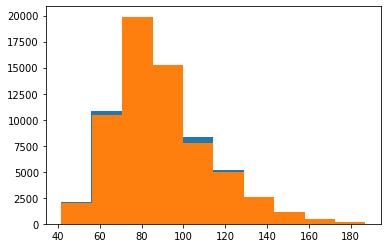

In [12]:
plt.hist(60000/(1000*y_rr))
plt.hist(y_label)

In [56]:
y_rr

array([[0.63978023],
       [0.64678572],
       [0.66607141],
       ...,
       [0.68619049],
       [0.75185714],
       [0.64362638]])